In [1]:
%%capture 
!pip install datasets transformers
!pip install optuna
!apt install git-lfs

In [19]:
import torch
import optuna
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import optuna.visualization as vis


from utils import *
from tqdm import tqdm
from transformers import logging
from transformers import BertTokenizer
from sklearn.metrics import matthews_corrcoef
from transformers import BertForSequenceClassification
# logging.set_verbosity_error()

# **PART 1**

In [2]:
class BertObjective:
    def __init__(self, d, device):
        self.d = d
        self.device = device

    def __call__(self, trial: optuna.trial.Trial):
        self.lr = trial.suggest_float("lr", self.d["lr"][0], self.d["lr"][1], log=True)
        self.n_epochs = trial.suggest_int("n_epochs", self.d["n_epochs"][0], self.d["n_epochs"][1])
        self.max_length = trial.suggest_int("max_length", self.d["max_length"][0], self.d["max_length"][1], step=8)
        self.dropout_rate = trial.suggest_float("dropout_rate", self.d["dropout_rate"][0], self.d["dropout_rate"][1])

        model, loader, optimizer, scheduler = init_objects(
            self.lr, self.n_epochs, self.max_length, self.dropout_rate, batch_size)
        model.to(self.device)
        _, _, _, _, val_mcc = train_eval_loop(
            model, loader, optimizer, scheduler, self.device, self.n_epochs)

        return val_mcc

In [ ]:
lr = 2e-5
n_epochs = 1
max_length = 16
batch_size = 64
test_size = 0.2
dropout_rate = 0.1
random_state = 2023
device = torch.device("cuda")

model, loader, optimizer, scheduler = init_objects(
    lr, n_epochs, max_length, dropout_rate, batch_size, test_size, random_state)

model.to(device)

# Hyperparam Tune
param_dict = {
    "lr": [1e-5, 2e-5],
    "n_epochs": [1, 2, 3],
    "max_length": [32, 80],
    "dropout_rate": [0, 0.5]  
}

In [4]:
device = torch.device("cuda")
study = optuna.create_study(study_name="Stduy 0", direction="maximize")
study.optimize(BertObjective(param_dict, device), n_trials=20)

[I 2023-05-07 15:56:32,473] A new study created in memory with name: Stduy 0


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 1 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.56
  Training MCC: 0.21
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.99it/s]
[I 2023-05-07 15:58:11,138] Trial 0 finished with value: 25.318378228797968 and parameters: {'lr': 1.048602390611967e-05, 'n_epochs': 1, 'max_length': 64, 'dropout_rate': 0.41292172054063087}. Best is trial 0 with value: 25.318378228797968.


  Validation loss: 0.54
 Validation MCC: 25.32
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 1 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.58
  Training MCC: 0.19
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]
[I 2023-05-07 15:59:48,303] Trial 1 finished with value: 27.41643122268392 and parameters: {'lr': 1.3548227816445599e-05, 'n_epochs': 1, 'max_length': 56, 'dropout_rate': 0.4886902014440031}. Best is trial 1 with value: 27.41643122268392.


  Validation loss: 0.53
 Validation MCC: 27.42
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:01,  2.18it/s]



Average training loss: 0.55
  Training MCC: 0.25
  Training epoch took: 0:01:02

Running Validation...


100%|██████████| 17/17 [00:03<00:00,  4.55it/s]


  Validation loss: 0.56
 Validation MCC: 37.92
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:01,  2.18it/s]



Average training loss: 0.43
  Training MCC: 0.38
  Training epoch took: 0:01:01

Running Validation...


100%|██████████| 17/17 [00:03<00:00,  4.48it/s]
[I 2023-05-07 16:02:02,069] Trial 2 finished with value: 40.78568117486318 and parameters: {'lr': 1.6572579734992122e-05, 'n_epochs': 2, 'max_length': 32, 'dropout_rate': 0.4611444827769712}. Best is trial 2 with value: 40.78568117486318.


  Validation loss: 0.53
 Validation MCC: 40.79
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 1 ========
Training...


134it [01:12,  1.86it/s]



Average training loss: 0.54
  Training MCC: 0.27
  Training epoch took: 0:01:12

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]
[I 2023-05-07 16:03:21,989] Trial 3 finished with value: 39.42570955767147 and parameters: {'lr': 1.579905952461434e-05, 'n_epochs': 1, 'max_length': 40, 'dropout_rate': 0.2859715352827533}. Best is trial 2 with value: 40.78568117486318.


  Validation loss: 0.51
 Validation MCC: 39.43
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.54
  Training MCC: 0.29
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.92it/s]


  Validation loss: 0.54
 Validation MCC: 40.36
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.42
  Training MCC: 0.41
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.91it/s]
[I 2023-05-07 16:06:33,722] Trial 4 finished with value: 44.401905480571166 and parameters: {'lr': 1.7108023438418093e-05, 'n_epochs': 2, 'max_length': 64, 'dropout_rate': 0.2407128901250118}. Best is trial 4 with value: 44.401905480571166.


  Validation loss: 0.51
 Validation MCC: 44.40
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 1 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.55
  Training MCC: 0.27
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.94it/s]
[I 2023-05-07 16:08:11,188] Trial 5 finished with value: 37.572198547643396 and parameters: {'lr': 1.7288377215504293e-05, 'n_epochs': 1, 'max_length': 64, 'dropout_rate': 0.25137625548317644}. Best is trial 4 with value: 44.401905480571166.


  Validation loss: 0.51
 Validation MCC: 37.57
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:12,  1.85it/s]



Average training loss: 0.54
  Training MCC: 0.26
  Training epoch took: 0:01:12

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.94it/s]


  Validation loss: 0.55
 Validation MCC: 38.70
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:12,  1.86it/s]



Average training loss: 0.43
  Training MCC: 0.39
  Training epoch took: 0:01:12

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]
[I 2023-05-07 16:10:47,667] Trial 6 finished with value: 39.78171480805471 and parameters: {'lr': 1.1934316187217735e-05, 'n_epochs': 2, 'max_length': 40, 'dropout_rate': 0.07580999051698811}. Best is trial 4 with value: 44.401905480571166.


  Validation loss: 0.54
 Validation MCC: 39.78
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.56
  Training MCC: 0.28
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.92it/s]


  Validation loss: 0.52
 Validation MCC: 39.90
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.43
  Training MCC: 0.39
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.92it/s]
[I 2023-05-07 16:13:59,118] Trial 7 finished with value: 43.8733286840108 and parameters: {'lr': 1.6650213809011662e-05, 'n_epochs': 2, 'max_length': 48, 'dropout_rate': 0.42162021423842366}. Best is trial 4 with value: 44.401905480571166.


  Validation loss: 0.50
 Validation MCC: 43.87
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 1 ========
Training...


134it [01:30,  1.48it/s]



Average training loss: 0.59
  Training MCC: 0.16
  Training epoch took: 0:01:31

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.90it/s]
[I 2023-05-07 16:15:38,303] Trial 8 finished with value: 30.201568070456595 and parameters: {'lr': 1.1026952990276664e-05, 'n_epochs': 1, 'max_length': 72, 'dropout_rate': 0.4377529014157503}. Best is trial 4 with value: 44.401905480571166.


  Validation loss: 0.54
 Validation MCC: 30.20
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 1 ========
Training...


134it [01:29,  1.49it/s]



Average training loss: 0.54
  Training MCC: 0.29
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.89it/s]
[I 2023-05-07 16:17:17,292] Trial 9 finished with value: 37.0049539832822 and parameters: {'lr': 1.6894441285876955e-05, 'n_epochs': 1, 'max_length': 64, 'dropout_rate': 0.10579679398609781}. Best is trial 4 with value: 44.401905480571166.


  Validation loss: 0.52
 Validation MCC: 37.00
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:30,  1.49it/s]



Average training loss: 0.52
  Training MCC: 0.33
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.90it/s]


  Validation loss: 0.51
 Validation MCC: 40.83
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.39
  Training MCC: 0.45
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.92it/s]
[I 2023-05-07 16:20:29,694] Trial 10 finished with value: 47.34511960173731 and parameters: {'lr': 1.9947155840205548e-05, 'n_epochs': 2, 'max_length': 80, 'dropout_rate': 0.1549759352026283}. Best is trial 10 with value: 47.34511960173731.


  Validation loss: 0.50
 Validation MCC: 47.35
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.53
  Training MCC: 0.30
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.91it/s]


  Validation loss: 0.50
 Validation MCC: 44.15
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.40
  Training MCC: 0.44
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.94it/s]
[I 2023-05-07 16:23:41,322] Trial 11 finished with value: 46.74681104776002 and parameters: {'lr': 1.985412725231133e-05, 'n_epochs': 2, 'max_length': 80, 'dropout_rate': 0.16142764710967392}. Best is trial 10 with value: 47.34511960173731.


  Validation loss: 0.50
 Validation MCC: 46.75
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.52
  Training MCC: 0.34
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.91it/s]


  Validation loss: 0.49
 Validation MCC: 43.83
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.38
  Training MCC: 0.46
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]
[I 2023-05-07 16:26:52,320] Trial 12 finished with value: 46.879255691012254 and parameters: {'lr': 1.999280975558933e-05, 'n_epochs': 2, 'max_length': 80, 'dropout_rate': 0.006064219567022661}. Best is trial 10 with value: 47.34511960173731.


  Validation loss: 0.50
 Validation MCC: 46.88
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.52
  Training MCC: 0.33
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.94it/s]


  Validation loss: 0.50
 Validation MCC: 43.28
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.39
  Training MCC: 0.45
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]
[I 2023-05-07 16:30:02,908] Trial 13 finished with value: 47.244360898391605 and parameters: {'lr': 1.9252976634222544e-05, 'n_epochs': 2, 'max_length': 80, 'dropout_rate': 0.011476103876380784}. Best is trial 10 with value: 47.34511960173731.


  Validation loss: 0.50
 Validation MCC: 47.24
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.52
  Training MCC: 0.33
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.92it/s]


  Validation loss: 0.49
 Validation MCC: 44.15
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.39
  Training MCC: 0.44
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]
[I 2023-05-07 16:33:14,190] Trial 14 finished with value: 45.50654751616791 and parameters: {'lr': 1.8719197947612167e-05, 'n_epochs': 2, 'max_length': 80, 'dropout_rate': 0.02946176151782317}. Best is trial 10 with value: 47.34511960173731.


  Validation loss: 0.50
 Validation MCC: 45.51
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.54
  Training MCC: 0.29
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.92it/s]


  Validation loss: 0.53
 Validation MCC: 43.46
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.40
  Training MCC: 0.42
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.92it/s]
[I 2023-05-07 16:36:25,490] Trial 15 finished with value: 46.18710799301499 and parameters: {'lr': 1.8807508777305433e-05, 'n_epochs': 2, 'max_length': 72, 'dropout_rate': 0.1324553349811367}. Best is trial 10 with value: 47.34511960173731.


  Validation loss: 0.50
 Validation MCC: 46.19
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.53
  Training MCC: 0.31
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]


  Validation loss: 0.51
 Validation MCC: 41.49
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.41
  Training MCC: 0.42
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.94it/s]
[I 2023-05-07 16:39:37,546] Trial 16 finished with value: 44.6801662264974 and parameters: {'lr': 1.4930981601592848e-05, 'n_epochs': 2, 'max_length': 72, 'dropout_rate': 0.0007804880763925218}. Best is trial 10 with value: 47.34511960173731.


  Validation loss: 0.50
 Validation MCC: 44.68
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.53
  Training MCC: 0.33
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.94it/s]


  Validation loss: 0.50
 Validation MCC: 43.03
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.40
  Training MCC: 0.44
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]
[I 2023-05-07 16:42:52,978] Trial 17 finished with value: 46.08422807965062 and parameters: {'lr': 1.8490770723494927e-05, 'n_epochs': 2, 'max_length': 80, 'dropout_rate': 0.05818231739591295}. Best is trial 10 with value: 47.34511960173731.


  Validation loss: 0.50
 Validation MCC: 46.08
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.55
  Training MCC: 0.27
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.94it/s]


  Validation loss: 0.53
 Validation MCC: 38.79
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.42
  Training MCC: 0.40
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]
[I 2023-05-07 16:46:15,576] Trial 18 finished with value: 43.66584436491535 and parameters: {'lr': 1.4972265381698523e-05, 'n_epochs': 2, 'max_length': 56, 'dropout_rate': 0.15619058190797794}. Best is trial 10 with value: 47.34511960173731.


  Validation loss: 0.50
 Validation MCC: 43.67
 Validation took: 0:00:04


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 2 ========
Training...


134it [01:29,  1.49it/s]



Average training loss: 0.53
  Training MCC: 0.33
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.94it/s]


  Validation loss: 0.51
 Validation MCC: 43.23
 Validation took: 0:00:04

======== Epoch 2 / 2 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.40
  Training MCC: 0.44
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.92it/s]
[I 2023-05-07 16:50:56,845] Trial 19 finished with value: 45.55605265260504 and parameters: {'lr': 1.8104214398441636e-05, 'n_epochs': 2, 'max_length': 72, 'dropout_rate': 0.0734036198249846}. Best is trial 10 with value: 47.34511960173731.


  Validation loss: 0.51
 Validation MCC: 45.56
 Validation took: 0:00:04


In [5]:
best_trial = study.best_trial
# Print the best trial's parameters and objective value
print("Best trial:")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")
print(f"  MCC Value: {best_trial.value:.3f}")

Best trial:
  Params: 
    lr: 1.9947155840205548e-05
    n_epochs: 2
    max_length: 80
    dropout_rate: 0.1549759352026283
  MCC Value: 47.345


In [6]:
vis.plot_contour(study)

In [7]:
vis.plot_param_importances(study)

In [8]:
df = study.trials_dataframe()

df = df.drop(columns=["datetime_start", "datetime_complete", "duration", "state"])
df = df.set_index("number")
df = df.rename(columns={"value": "MCC Values", "number": "Iteration Num",
                        "params_lr": "lr", "params_max_length": "max_length",
                        "params_n_epochs": "epochs", "params_dropout_rate": "dropout_rate"})
col = df.pop("MCC Values")
df.insert(len(df.columns), "MCC Values", col)
df.index = df.index + 1

left_df = df.iloc[:10]
right_df = df.iloc[10:]

# Concatenate the dataframes horizontally
side_by_side = pd.concat([left_df.reset_index(drop=True), right_df.reset_index(drop=False)], axis=1)
side_by_side = side_by_side.rename_axis('number')
# Print the side-by-side dataframes
side_by_side

,dropout_rate,lr,max_length,epochs,MCC Values
number,,,,,
1,0.412922,0.000010,64,1,25.318378
2,0.488690,0.000014,56,1,27.416431
3,0.461144,0.000017,32,2,40.785681
4,0.285972,0.000016,40,1,39.425710
5,0.240713,0.000017,64,2,44.401905
6,0.251376,0.000017,64,1,37.572199
7,0.075810,0.000012,40,2,39.781715
8,0.421620,0.000017,48,2,43.873329
9,0.437753,0.000011,72,1,30.201568


In [11]:
# Train again with best parameters
lr = study.best_params["lr"]
n_epochs = 5
max_length = study.best_params["max_length"]
dropout_rate = study.best_params["dropout_rate"]

model, loader, optimizer, scheduler = init_objects(lr, n_epochs, max_length, dropout_rate, batch_size)
model.to(device)
train_loss_values, train_mcc_values, val_loss_values, val_mcc_values, _ = train_eval_loop(model, loader, optimizer, scheduler, device, n_epochs)

  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at


======== Epoch 1 / 5 ========
Training...


134it [01:30,  1.49it/s]



Average training loss: 0.52
  Training MCC: 0.33
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.89it/s]


  Validation loss: 0.48
 Validation MCC: 46.06
 Validation took: 0:00:04

======== Epoch 2 / 5 ========
Training...


134it [01:30,  1.48it/s]



Average training loss: 0.38
  Training MCC: 0.46
  Training epoch took: 0:01:31

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]


  Validation loss: 0.56
 Validation MCC: 45.07
 Validation took: 0:00:04

======== Epoch 3 / 5 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.26
  Training MCC: 0.56
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]


  Validation loss: 0.61
 Validation MCC: 45.89
 Validation took: 0:00:04

======== Epoch 4 / 5 ========
Training...


134it [01:29,  1.49it/s]



Average training loss: 0.20
  Training MCC: 0.62
  Training epoch took: 0:01:30

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.94it/s]


  Validation loss: 0.64
 Validation MCC: 49.79
 Validation took: 0:00:04

======== Epoch 5 / 5 ========
Training...


134it [01:29,  1.50it/s]



Average training loss: 0.17
  Training MCC: 0.67
  Training epoch took: 0:01:29

Running Validation...


100%|██████████| 17/17 [00:04<00:00,  3.93it/s]

  Validation loss: 0.59
 Validation MCC: 52.61
 Validation took: 0:00:04


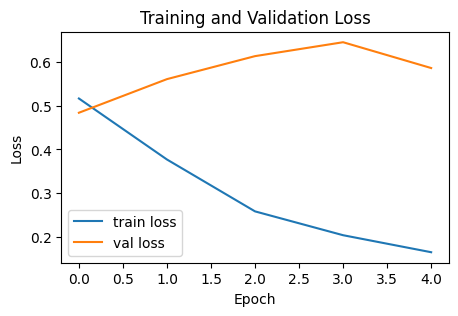

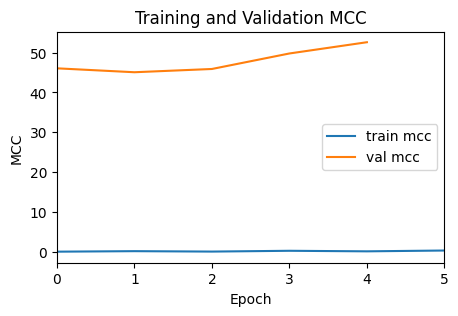

In [17]:
# Plot the training and validation loss values
plt.figure(figsize=(5, 3))
plt.plot(train_loss_values, label='train loss')
plt.plot(val_loss_values, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation MCC values
plt.figure(figsize=(5, 3))
plt.plot(train_mcc_values, label='train mcc')
plt.plot(val_mcc_values, label='val mcc')
plt.xlabel('Epoch')
plt.ylabel('MCC')
plt.xlim((0, 5))
plt.title('Training and Validation MCC')
plt.legend()

plt.show()

# **PART 2 with Mean Pooling**

In [20]:
class BERTPoolingSequenceClassifier(nn.Module):
    def __init__(self, bert_model, num_classes):
        super(BERTPoolingSequenceClassifier, self).__init__()
        model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_classes)
        self.bert = model.bert 
        self.num_classes = num_classes
        self.dropout = nn.Dropout(0.1)
        self.classifier = model.classifier

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        pooled_output = torch.mean(outputs[0], dim=1) # mean pooling over token embeddings
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_classes), labels.view(-1))
            return {"loss": loss, "logits": logits}
        else:
            return {"logits": logits}

In [21]:
def objective(trial):
    # Sample the hyperparameters to search
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 2e-5, log=True)
    max_length = trial.suggest_int("max_length", 16, 64, step=8)
    n_epochs = trial.suggest_int("n_epochs", 1, 3)

    # Create a new instance of the BERTPoolingSequenceClassifier model
    bert_model = "bert-base-uncased"  # or any other BERT model
    num_classes = 2
    tokenizer = BertTokenizer.from_pretrained(bert_model)
    model = BERTPoolingSequenceClassifier(bert_model, num_classes)
    model = model.to(device)

    # Set up the optimizer with the suggested learning rate
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Set the maximum sequence length of the tokenizer
    tokenizer.max_len = max_length

    # Train and evaluate the model
    for epoch in range(n_epochs):
        # Training loop
        total_train_loss = 0
        train_mcc_values = []
        model.train()
        for batch in tqdm(loader["train"]):
            optimizer.zero_grad()
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs["loss"]
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

            logits = outputs["logits"]
            logits = logits.detach().cpu().numpy()
            logits = np.argmax(logits, axis=1).flatten()
            label_ids = labels.to("cpu").numpy()
            train_mcc = matthews_corrcoef(logits, label_ids)
            train_mcc_values.append(train_mcc)

        avg_train_loss = total_train_loss / len(loader["train"])
        avg_train_mcc = np.mean(train_mcc_values)

        # Validation loop
        model.eval()
        total_eval_loss = 0
        total_eval_mcc = 0
        num_eval_steps = 0
        for batch in tqdm(loader["validation"]):
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs["loss"]
                logits = outputs["logits"]
                logits = logits.detach().cpu().numpy()
                logits = np.argmax(logits, axis=1).flatten()
                label_ids = labels.to("cpu").numpy()
                val_mcc = matthews_corrcoef(logits, label_ids)
            total_eval_loss += loss.item()
            total_eval_mcc += val_mcc
            num_eval_steps += 1
        avg_eval_loss = total_eval_loss / num_eval_steps
        avg_eval_mcc = total_eval_mcc / num_eval_steps

        # Print the training and validation loss and MCC for this epoch
        print("Epoch {}/{}: Training Loss = {:.4f}, Training MCC = {:.4f}, Validation Loss = {:.4f}, Validation MCC = {:.4f}".format(epoch+1, n_epochs, avg_train_loss, avg_train_mcc, avg_eval_loss, avg_eval_mcc))
        print("\n")
    return avg_eval_mcc

def best_model_train(learning_rate, max_length, n_epochs):
    # Create a new instance of the BERTPoolingSequenceClassifier model
    bert_model = "bert-base-uncased"  # or any other BERT model
    num_classes = 2
    tokenizer = BertTokenizer.from_pretrained(bert_model)
    model = BERTPoolingSequenceClassifier(bert_model, num_classes)
    model = model.to(device)

    # Set up the optimizer with the suggested learning rate
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Set the maximum sequence length of the tokenizer
    tokenizer.max_len = max_length

    # Train and evaluate the model
    for epoch in range(n_epochs):
        # Training loop
        total_train_loss = 0
        train_mcc_values = []
        model.train()
        for batch in tqdm(loader["train"]):
            optimizer.zero_grad()
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs["loss"]
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

            logits = outputs["logits"]
            logits = logits.detach().cpu().numpy()
            logits = np.argmax(logits, axis=1).flatten()
            label_ids = labels.to("cpu").numpy()
            train_mcc = matthews_corrcoef(logits, label_ids)
            train_mcc_values.append(train_mcc)

        avg_train_loss = total_train_loss / len(loader["train"])
        avg_train_mcc = np.mean(train_mcc_values)

        # Validation loop
        model.eval()
        total_eval_loss = 0
        total_eval_mcc = 0
        num_eval_steps = 0
        for batch in tqdm(loader["validation"]):
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs["loss"]
                logits = outputs["logits"]
                logits = logits.detach().cpu().numpy()
                logits = np.argmax(logits, axis=1).flatten()
                label_ids = labels.to("cpu").numpy()
                val_mcc = matthews_corrcoef(logits, label_ids)
            total_eval_loss += loss.item()
            total_eval_mcc += val_mcc
            num_eval_steps += 1
        avg_eval_loss = total_eval_loss / num_eval_steps
        avg_eval_mcc = total_eval_mcc / num_eval_steps

        # Print the training and validation loss and MCC for this epoch
        print("Epoch {}/{}: Training Loss = {:.4f}, Training MCC = {:.4f}, Validation Loss = {:.4f}, Validation MCC = {:.4f}".format(epoch+1, n_epochs, avg_train_loss, avg_train_mcc, avg_eval_loss, avg_eval_mcc))
        print("\n")

In [22]:
# Set up the study and optimize the hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Print the best hyperparameters found
print("Best hyperparameters:", study.best_params)

[I 2023-05-07 17:18:01,759] A new study created in memory with name: no-name-8ddb71ba-eec5-450e-ad7b-5d1e4151f943
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClas

Epoch 1/2: Training Loss = 0.5251, Training MCC = 0.2568, Validation Loss = 0.4609, Validation MCC = 0.4777




100%|██████████| 17/17 [00:02<00:00,  7.80it/s]
[I 2023-05-07 17:20:22,500] Trial 0 finished with value: 0.5043865892077378 and parameters: {'learning_rate': 1.2434959473134158e-05, 'max_length': 64, 'n_epochs': 2}. Best is trial 0 with value: 0.5043865892077378.


Epoch 2/2: Training Loss = 0.3802, Training MCC = 0.5676, Validation Loss = 0.5014, Validation MCC = 0.5044




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/1: Training Loss = 0.5089, Training MCC = 0.3207, Validation Loss = 0.4458, Validation MCC = 0.4733




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/2: Training Loss = 0.5264, Training MCC = 0.2552, Validation Loss = 0.4819, Validation MCC = 0.4337




100%|██████████| 17/17 [00:02<00:00,  7.89it/s]
[I 2023-05-07 17:23:55,173] Trial 2 finished with value: 0.47207987020399644 and parameters: {'learning_rate': 1.03436473611556e-05, 'max_length': 48, 'n_epochs': 2}. Best is trial 0 with value: 0.5043865892077378.


Epoch 2/2: Training Loss = 0.3996, Training MCC = 0.5441, Validation Loss = 0.4926, Validation MCC = 0.4721




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/3: Training Loss = 0.5095, Training MCC = 0.3311, Validation Loss = 0.4484, Validation MCC = 0.4738




100%|██████████| 17/17 [00:02<00:00,  7.84it/s]


Epoch 2/3: Training Loss = 0.3516, Training MCC = 0.6190, Validation Loss = 0.4768, Validation MCC = 0.4784




100%|██████████| 17/17 [00:02<00:00,  7.89it/s]
[I 2023-05-07 17:27:27,133] Trial 3 finished with value: 0.4750924908859182 and parameters: {'learning_rate': 1.9084317704006148e-05, 'max_length': 56, 'n_epochs': 3}. Best is trial 0 with value: 0.5043865892077378.


Epoch 3/3: Training Loss = 0.2463, Training MCC = 0.7555, Validation Loss = 0.5808, Validation MCC = 0.4751




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/1: Training Loss = 0.5305, Training MCC = 0.2306, Validation Loss = 0.4890, Validation MCC = 0.4076




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/1: Training Loss = 0.5011, Training MCC = 0.3306, Validation Loss = 0.4451, Validation MCC = 0.4781




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/1: Training Loss = 0.5188, Training MCC = 0.2983, Validation Loss = 0.4614, Validation MCC = 0.4419




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/3: Training Loss = 0.5157, Training MCC = 0.2704, Validation Loss = 0.4623, Validation MCC = 0.4973




100%|██████████| 17/17 [00:02<00:00,  7.86it/s]


Epoch 2/3: Training Loss = 0.3656, Training MCC = 0.5867, Validation Loss = 0.4662, Validation MCC = 0.5293




100%|██████████| 17/17 [00:02<00:00,  7.92it/s]
[I 2023-05-07 17:34:33,577] Trial 7 finished with value: 0.5043513220611693 and parameters: {'learning_rate': 1.8919861869651883e-05, 'max_length': 56, 'n_epochs': 3}. Best is trial 0 with value: 0.5043865892077378.


Epoch 3/3: Training Loss = 0.2546, Training MCC = 0.7436, Validation Loss = 0.5824, Validation MCC = 0.5044




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/2: Training Loss = 0.5085, Training MCC = 0.3236, Validation Loss = 0.4452, Validation MCC = 0.4680




100%|██████████| 17/17 [00:02<00:00,  7.90it/s]
[I 2023-05-07 17:36:54,874] Trial 8 finished with value: 0.4813654626234548 and parameters: {'learning_rate': 1.8564901650634554e-05, 'max_length': 16, 'n_epochs': 2}. Best is trial 0 with value: 0.5043865892077378.


Epoch 2/2: Training Loss = 0.3544, Training MCC = 0.6015, Validation Loss = 0.4764, Validation MCC = 0.4814




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/3: Training Loss = 0.5103, Training MCC = 0.2979, Validation Loss = 0.4591, Validation MCC = 0.4378




100%|██████████| 17/17 [00:02<00:00,  7.84it/s]


Epoch 2/3: Training Loss = 0.3565, Training MCC = 0.6016, Validation Loss = 0.4692, Validation MCC = 0.5231




100%|██████████| 17/17 [00:02<00:00,  7.91it/s]
[I 2023-05-07 17:40:26,294] Trial 9 finished with value: 0.47742683261371455 and parameters: {'learning_rate': 1.737146207573849e-05, 'max_length': 64, 'n_epochs': 3}. Best is trial 0 with value: 0.5043865892077378.


Epoch 3/3: Training Loss = 0.2478, Training MCC = 0.7462, Validation Loss = 0.5958, Validation MCC = 0.4774




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/2: Training Loss = 0.5207, Training MCC = 0.2768, Validation Loss = 0.4590, Validation MCC = 0.4868




100%|██████████| 17/17 [00:02<00:00,  7.87it/s]
[I 2023-05-07 17:42:48,420] Trial 10 finished with value: 0.4743442457556296 and parameters: {'learning_rate': 1.2891775792441033e-05, 'max_length': 40, 'n_epochs': 2}. Best is trial 0 with value: 0.5043865892077378.


Epoch 2/2: Training Loss = 0.3818, Training MCC = 0.5594, Validation Loss = 0.4906, Validation MCC = 0.4743




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/3: Training Loss = 0.5029, Training MCC = 0.3129, Validation Loss = 0.4490, Validation MCC = 0.5046




100%|██████████| 17/17 [00:02<00:00,  7.91it/s]


Epoch 2/3: Training Loss = 0.3413, Training MCC = 0.6206, Validation Loss = 0.4944, Validation MCC = 0.4633




100%|██████████| 17/17 [00:02<00:00,  7.88it/s]
[I 2023-05-07 17:46:19,689] Trial 11 finished with value: 0.47077260619813427 and parameters: {'learning_rate': 1.9140010262171555e-05, 'max_length': 56, 'n_epochs': 3}. Best is trial 0 with value: 0.5043865892077378.


Epoch 3/3: Training Loss = 0.2324, Training MCC = 0.7690, Validation Loss = 0.6100, Validation MCC = 0.4708




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/3: Training Loss = 0.5141, Training MCC = 0.2958, Validation Loss = 0.4551, Validation MCC = 0.4656




100%|██████████| 17/17 [00:02<00:00,  7.89it/s]


Epoch 2/3: Training Loss = 0.3604, Training MCC = 0.6029, Validation Loss = 0.5184, Validation MCC = 0.4973




100%|██████████| 17/17 [00:02<00:00,  7.87it/s]
[I 2023-05-07 17:49:51,220] Trial 12 finished with value: 0.4717652148948268 and parameters: {'learning_rate': 1.595412805362585e-05, 'max_length': 64, 'n_epochs': 3}. Best is trial 0 with value: 0.5043865892077378.


Epoch 3/3: Training Loss = 0.2580, Training MCC = 0.7384, Validation Loss = 0.5683, Validation MCC = 0.4718




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/2: Training Loss = 0.5227, Training MCC = 0.2593, Validation Loss = 0.4714, Validation MCC = 0.4539




100%|██████████| 17/17 [00:02<00:00,  7.86it/s]
[I 2023-05-07 17:52:13,289] Trial 13 finished with value: 0.533179200635397 and parameters: {'learning_rate': 1.3544104379994387e-05, 'max_length': 56, 'n_epochs': 2}. Best is trial 13 with value: 0.533179200635397.


Epoch 2/2: Training Loss = 0.3863, Training MCC = 0.5658, Validation Loss = 0.4949, Validation MCC = 0.5332




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/2: Training Loss = 0.5198, Training MCC = 0.2748, Validation Loss = 0.4678, Validation MCC = 0.4876




100%|██████████| 17/17 [00:02<00:00,  7.90it/s]
[I 2023-05-07 17:54:34,694] Trial 14 finished with value: 0.5358103870524524 and parameters: {'learning_rate': 1.3318634599016148e-05, 'max_length': 48, 'n_epochs': 2}. Best is trial 14 with value: 0.5358103870524524.


Epoch 2/2: Training Loss = 0.3819, Training MCC = 0.5662, Validation Loss = 0.4858, Validation MCC = 0.5358




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/2: Training Loss = 0.5152, Training MCC = 0.3005, Validation Loss = 0.4592, Validation MCC = 0.4789




100%|██████████| 17/17 [00:02<00:00,  7.88it/s]
[I 2023-05-07 17:56:55,901] Trial 15 finished with value: 0.43790751139988154 and parameters: {'learning_rate': 1.3734336458161343e-05, 'max_length': 40, 'n_epochs': 2}. Best is trial 14 with value: 0.5358103870524524.


Epoch 2/2: Training Loss = 0.3869, Training MCC = 0.5661, Validation Loss = 0.4951, Validation MCC = 0.4379




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/2: Training Loss = 0.5153, Training MCC = 0.2991, Validation Loss = 0.4552, Validation MCC = 0.4349




100%|██████████| 17/17 [00:02<00:00,  7.88it/s]
[I 2023-05-07 17:59:17,302] Trial 16 finished with value: 0.45369828827904657 and parameters: {'learning_rate': 1.357577285563636e-05, 'max_length': 48, 'n_epochs': 2}. Best is trial 14 with value: 0.5358103870524524.


Epoch 2/2: Training Loss = 0.3669, Training MCC = 0.5835, Validation Loss = 0.4991, Validation MCC = 0.4537




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/2: Training Loss = 0.5248, Training MCC = 0.2542, Validation Loss = 0.4919, Validation MCC = 0.4129




100%|██████████| 17/17 [00:02<00:00,  7.90it/s]
[I 2023-05-07 18:01:39,358] Trial 17 finished with value: 0.44480462168646384 and parameters: {'learning_rate': 1.1654229110154933e-05, 'max_length': 32, 'n_epochs': 2}. Best is trial 14 with value: 0.5358103870524524.


Epoch 2/2: Training Loss = 0.3885, Training MCC = 0.5556, Validation Loss = 0.5443, Validation MCC = 0.4448




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/1: Training Loss = 0.5067, Training MCC = 0.3304, Validation Loss = 0.4506, Validation MCC = 0.4767




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/2: Training Loss = 0.5138, Training MCC = 0.3042, Validation Loss = 0.4436, Validation MCC = 0.5076




100%|██████████| 17/17 [00:02<00:00,  7.89it/s]
[I 2023-05-07 18:05:12,194] Trial 19 finished with value: 0.4761365517851829 and parameters: {'learning_rate': 1.544434151669758e-05, 'max_length': 56, 'n_epochs': 2}. Best is trial 14 with value: 0.5358103870524524.


Epoch 2/2: Training Loss = 0.3771, Training MCC = 0.5787, Validation Loss = 0.4892, Validation MCC = 0.4761


Best hyperparameters: {'learning_rate': 1.3318634599016148e-05, 'max_length': 48, 'n_epochs': 2}


In [23]:
best_trial = study.best_trial
# Print the best trial's parameters and objective value
print("Best trial:")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")
print(f"  MCC Value: {best_trial.value:.3f}")

Best trial:
  Params: 
    learning_rate: 1.3318634599016148e-05
    max_length: 48
    n_epochs: 2
  MCC Value: 0.536


In [24]:
vis.plot_contour(study)

In [25]:
vis.plot_param_importances(study)

In [27]:
df = study.trials_dataframe()

df = df.drop(columns=["datetime_start", "datetime_complete", "duration", "state"])
df = df.set_index("number")
df = df.rename(columns={"value": "MCC Values", "number": "Iteration Num",
                        "params_learning_rate": "learning_rate", "params_max_length": "max_length",
                        "params_n_epochs": "epochs", "params_dropout_rate": "dropout_rate"})
col = df.pop("MCC Values")
df.insert(len(df.columns), "MCC Values", col)
df.index = df.index + 1

left_df = df.iloc[:10]
right_df = df.iloc[10:]

# Concatenate the dataframes horizontally
side_by_side = pd.concat([left_df.reset_index(drop=True), right_df.reset_index(drop=False)], axis=1)
side_by_side = side_by_side.rename_axis('number')
# Print the side-by-side dataframes
side_by_side

,learning_rate,max_length,epochs,MCC Values
number,,,,
1,0.000012,64,2,0.504387
2,0.000015,64,1,0.473256
3,0.000010,48,2,0.472080
4,0.000019,56,3,0.475092
5,0.000012,48,1,0.407561
6,0.000017,24,1,0.478117
7,0.000015,32,1,0.441912
8,0.000019,56,3,0.504351
9,0.000019,16,2,0.481365


In [28]:
# Train again with best parameters
learning_rate = study.best_params["learning_rate"]
n_epochs = 5
max_length = study.best_params["max_length"]

best_model_train(learning_rate, max_length, n_epochs)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1/5: Training Loss = 0.5388, Training MCC = 0.2030, Validation Loss = 0.4733, Validation MCC = 0.4223




100%|██████████| 17/17 [00:02<00:00,  7.91it/s]


Epoch 2/5: Training Loss = 0.3857, Training MCC = 0.5624, Validation Loss = 0.4800, Validation MCC = 0.5334




100%|██████████| 17/17 [00:02<00:00,  7.84it/s]


Epoch 3/5: Training Loss = 0.2718, Training MCC = 0.7216, Validation Loss = 0.6029, Validation MCC = 0.4819




100%|██████████| 17/17 [00:02<00:00,  7.89it/s]


Epoch 4/5: Training Loss = 0.2108, Training MCC = 0.7977, Validation Loss = 0.5441, Validation MCC = 0.4815




100%|██████████| 17/17 [00:02<00:00,  7.90it/s]

Epoch 5/5: Training Loss = 0.1827, Training MCC = 0.8313, Validation Loss = 0.7437, Validation MCC = 0.3884




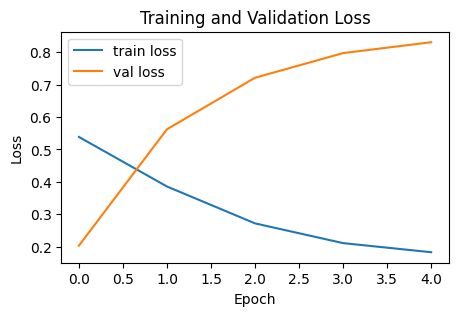

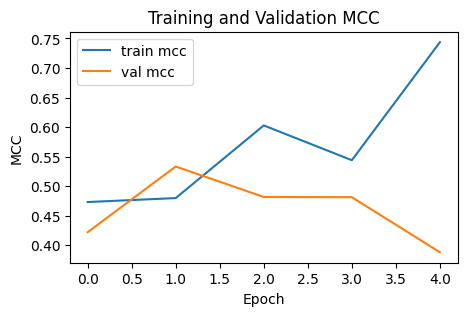

In [30]:
train_loss_values = [0.5388, 0.3857, 0.2718, 0.2108, 0.1827]
val_loss_values = [0.2030, 0.5624, 0.7216, 0.7977, 0.8313]
train_mcc_values = [0.4733, 0.4800, 0.6029, 0.5441, 0.7437]
val_mcc_values = [0.4223, 0.5334, 0.4819, 0.4815, 0.3884]

# Plot the training and validation loss values
plt.figure(figsize=(5, 3))
plt.plot(train_loss_values, label='train loss')
plt.plot(val_loss_values, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation MCC values
plt.figure(figsize=(5, 3))
plt.plot(train_mcc_values, label='train mcc')
plt.plot(val_mcc_values, label='val mcc')
plt.xlabel('Epoch')
plt.ylabel('MCC')
plt.title('Training and Validation MCC')
plt.legend()

plt.show()

# **PART 2 with Weighted Mean Pooling**

In [ ]:
class BERTWeightedPoolingSequenceClassifier(nn.Module):
    def __init__(self, bert_model, num_classes):
        super(BERTWeightedPoolingSequenceClassifier, self).__init__()
        model = BertForSequenceClassification.from_pretrained(bert_model, num_labels=num_classes)
        self.bert = model.bert 
        self.num_classes = num_classes
        self.dropout = nn.Dropout(0.1)
        self.weight_layer = nn.Linear(model.config.hidden_size, model.config.hidden_size, bias=True)
        self.classifier = model.classifier

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        sequence_output = outputs[0]
        weighted_output = self.weight_layer(sequence_output)
        weighted_output = torch.tanh(weighted_output)
        weighted_output = self.dropout(weighted_output)
        pooled_output = torch.sum(weighted_output, dim=1) # weighted sum pooling over token embeddings
        logits = self.classifier(pooled_output)

        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_classes), labels.view(-1))
            return {"loss": loss, "logits": logits}
        else:
            return {"logits": logits}

In [ ]:
def objective(trial):
    # Sample the hyperparameters to search
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 2e-5, log=True)
    max_length = trial.suggest_int("max_length", 16, 64, step=8)
    n_epochs = trial.suggest_int("n_epochs", 1, 3)

    # Create a new instance of the BERTPoolingSequenceClassifier model
    bert_model = "bert-base-uncased"  # or any other BERT model
    num_classes = 2
    tokenizer = BertTokenizer.from_pretrained(bert_model)
    model = BERTWeightedPoolingSequenceClassifier(bert_model, num_classes)
    model = model.to(device)

    # Set up the optimizer with the suggested learning rate
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Set the maximum sequence length of the tokenizer
    tokenizer.max_len = max_length

    # Train and evaluate the model
    for epoch in range(n_epochs):
        # Training loop
        total_train_loss = 0
        train_mcc_values = []
        model.train()
        for batch in tqdm(loader["train"]):
            optimizer.zero_grad()
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs["loss"]
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

            logits = outputs["logits"]
            logits = logits.detach().cpu().numpy()
            logits = np.argmax(logits, axis=1).flatten()
            label_ids = labels.to("cpu").numpy()
            train_mcc = matthews_corrcoef(logits, label_ids)
            train_mcc_values.append(train_mcc)

        avg_train_loss = total_train_loss / len(loader["train"])
        avg_train_mcc = np.mean(train_mcc_values)

        # Validation loop
        model.eval()
        total_eval_loss = 0
        total_eval_mcc = 0
        num_eval_steps = 0
        for batch in tqdm(loader["validation"]):
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs["loss"]
                logits = outputs["logits"]
                logits = logits.detach().cpu().numpy()
                logits = np.argmax(logits, axis=1).flatten()
                label_ids = labels.to("cpu").numpy()
                val_mcc = matthews_corrcoef(logits, label_ids)
            total_eval_loss += loss.item()
            total_eval_mcc += val_mcc
            num_eval_steps += 1
        avg_eval_loss = total_eval_loss / num_eval_steps
        avg_eval_mcc = total_eval_mcc / num_eval_steps

        # Print the training and validation loss and MCC for this epoch
        print("Epoch {}/{}: Training Loss = {:.4f}, Training MCC = {:.4f}, Validation Loss = {:.4f}, Validation MCC = {:.4f}".format(epoch+1, n_epochs, avg_train_loss, avg_train_mcc, avg_eval_loss, avg_eval_mcc))
        print("\n")
    return avg_eval_mcc

def best_model_train(learning_rate, max_length, n_epochs):
    # Create a new instance of the BERTPoolingSequenceClassifier model
    bert_model = "bert-base-uncased"  # or any other BERT model
    num_classes = 2
    tokenizer = BertTokenizer.from_pretrained(bert_model)
    model = BERTWeightedPoolingSequenceClassifier(bert_model, num_classes)
    model = model.to(device)

    # Set up the optimizer with the suggested learning rate
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Set the maximum sequence length of the tokenizer
    tokenizer.max_len = max_length

    # Train and evaluate the model
    for epoch in range(n_epochs):
        # Training loop
        total_train_loss = 0
        train_mcc_values = []
        model.train()
        for batch in tqdm(loader["train"]):
            optimizer.zero_grad()
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs["loss"]
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

            logits = outputs["logits"]
            logits = logits.detach().cpu().numpy()
            logits = np.argmax(logits, axis=1).flatten()
            label_ids = labels.to("cpu").numpy()
            train_mcc = matthews_corrcoef(logits, label_ids)
            train_mcc_values.append(train_mcc)

        avg_train_loss = total_train_loss / len(loader["train"])
        avg_train_mcc = np.mean(train_mcc_values)

        # Validation loop
        model.eval()
        total_eval_loss = 0
        total_eval_mcc = 0
        num_eval_steps = 0
        for batch in tqdm(loader["validation"]):
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs["loss"]
                logits = outputs["logits"]
                logits = logits.detach().cpu().numpy()
                logits = np.argmax(logits, axis=1).flatten()
                label_ids = labels.to("cpu").numpy()
                val_mcc = matthews_corrcoef(logits, label_ids)
            total_eval_loss += loss.item()
            total_eval_mcc += val_mcc
            num_eval_steps += 1
        avg_eval_loss = total_eval_loss / num_eval_steps
        avg_eval_mcc = total_eval_mcc / num_eval_steps

        # Print the training and validation loss and MCC for this epoch
        print("Epoch {}/{}: Training Loss = {:.4f}, Training MCC = {:.4f}, Validation Loss = {:.4f}, Validation MCC = {:.4f}".format(epoch+1, n_epochs, avg_train_loss, avg_train_mcc, avg_eval_loss, avg_eval_mcc))
        print("\n")

In [ ]:
# Set up the study and optimize the hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Print the best hyperparameters found
print("Best hyperparameters:", study.best_params)

In [ ]:
best_trial = study.best_trial
# Print the best trial's parameters and objective value
print("Best trial:")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")
print(f"  MCC Value: {best_trial.value:.3f}")

In [ ]:
vis.plot_contour(study)

In [ ]:
vis.plot_param_importances(study)

In [ ]:
df = study.trials_dataframe()

df = df.drop(columns=["datetime_start", "datetime_complete", "duration", "state"])
df = df.set_index("number")
df = df.rename(columns={"value": "MCC Values", "number": "Iteration Num",
                        "params_learning_rate": "lr", "params_max_length": "max_length",
                        "params_n_epochs": "epochs", "params_dropout_rate": "dropout_rate"})
col = df.pop("MCC Values")
df.insert(len(df.columns), "MCC Values", col)
df.index = df.index + 1

left_df = df.iloc[:10]
right_df = df.iloc[10:]

# Concatenate the dataframes horizontally
side_by_side = pd.concat([left_df.reset_index(drop=True), right_df.reset_index(drop=False)], axis=1)
side_by_side = side_by_side.rename_axis('number')
# Print the side-by-side dataframes
side_by_side

In [ ]:
# Train again with best parameters
learning_rate = study.best_params["learning_rate"]
n_epochs = 5
max_length = study.best_params["max_length"]


model.to(device)
best_model_train(learning_rate, max_length, n_epochs)

In [ ]:
# Plot the training and validation loss values
plt.figure(figsize=(5, 3))
plt.plot(train_loss_values, label='train loss')
plt.plot(val_loss_values, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation MCC values
plt.figure(figsize=(5, 3))
plt.plot(train_mcc_values, label='train mcc')
plt.plot(val_mcc_values, label='val mcc')
plt.xlabel('Epoch')
plt.ylabel('MCC')
plt.title('Training and Validation MCC')
plt.legend()

plt.show()